In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import pandas as pd 
from fredapi import Fred
import missingno
import matplotlib.pyplot as plt 

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score, recall_score, f1_score, classification_report ,roc_curve, roc_auc_score ,roc_curve, auc, ConfusionMatrixDisplay , RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

plt.style.use('ggplot')


from utils.extract_data import get_FRED_series
from utils.time_series_preprocessing import gathering_data_for_modeling

In [2]:
fred_series = get_FRED_series()
infos = fred_series['Infos']
tickers_series = fred_series["Data"] 

In [4]:
main_dataset = gathering_data_for_modeling(tickers_series,
                            infos,
                            chosen_target="USREC",
                            frequency_ajustment='target_frequency',begin_date='1960-01-01' )

            USREC
1960-01-31    0.0
1960-02-29    0.0
1960-03-31    0.0
1960-04-30    0.0
1960-05-31    1.0
...           ...
2023-05-31    0.0
2023-06-30    0.0
2023-07-31    0.0
2023-08-31    0.0
2023-09-30    0.0

[765 rows x 1 columns]
                GDPC1
1960-01-31   3517.181
1960-02-29        NaN
1960-03-31        NaN
1960-04-30   3498.246
1960-05-31        NaN
...               ...
2022-12-31        NaN
2023-01-31  22112.329
2023-02-28        NaN
2023-03-31        NaN
2023-04-30  22225.350

[760 rows x 1 columns]
               PIECTR
1960-01-31   2539.890
1960-02-29        NaN
1960-03-31        NaN
1960-04-30   2555.375
1960-05-31        NaN
...               ...
2022-12-31        NaN
2023-01-31  15540.775
2023-02-28        NaN
2023-03-31        NaN
2023-04-30  15630.370

[760 rows x 1 columns]
            PRS85006013
1960-01-31       46.061
1960-02-29          NaN
1960-03-31          NaN
1960-04-30       46.114
1960-05-31          NaN
...                 ...
2022-12-31      

In [8]:
main_dataset['USREC'].value_counts()

main_dataset.shape

(765, 21)

In [10]:
print("NAs proportion since 1960")

print(main_dataset.isna().sum()/main_dataset.shape[0])

print("#"*100)

print("NAs proportion since 1970")

print(main_dataset[main_dataset['date']>'1970-01-01'].isna().sum()/main_dataset.shape[0])

print("#"*100)

print("NAs proportion since 1980")

print(main_dataset[main_dataset['date']>'1980-01-01'].isna().sum()/main_dataset.shape[0])

print("#"*100)

print("NAs proportion since 1985")

print(main_dataset[main_dataset['date']>'1985-01-01'].isna().sum()/main_dataset.shape[0])

print("#"*100)


print("NAs proportion since 1990")

print(main_dataset[main_dataset['date']>'1990-01-01'].isna().sum()/main_dataset.shape[0])

print("#"*100)


NAs proportion since 1960
date            0.000000
USREC           0.000000
GDPC1           0.006536
PIECTR          0.006536
PRS85006013     0.006536
IPB50001SQ      0.006536
CQRMTSPL        0.116340
T10Y3M          0.345098
T10Y2Y          0.257516
BAMLH0A0HYM2    0.579085
BAA10Y          0.407843
AAAFF           0.360784
T10YIE          0.674510
T5YIE           0.674510
VIXCLS          0.470588
GVZCLS          0.759477
OVXCLS          0.742484
ATLSBUSRGEP     0.892810
ATLSBUEGEP      0.892810
ATLSBUSRGUP     0.892810
ATLSBUEGUP      0.892810
dtype: float64
####################################################################################################
NAs proportion since 1970
date            0.000000
USREC           0.000000
GDPC1           0.006536
PIECTR          0.006536
PRS85006013     0.006536
IPB50001SQ      0.006536
CQRMTSPL        0.006536
T10Y3M          0.188235
T10Y2Y          0.100654
BAMLH0A0HYM2    0.422222
BAA10Y          0.250980
AAAFF           0.203922
T10YIE 

In [12]:
main_dataset.to_csv("data/dataset_1960.csv")

In [11]:
dataset_1985 =  main_dataset[main_dataset['date'] >'1985-01-01']

<AxesSubplot:title={'center':'USREC'}, xlabel='date'>

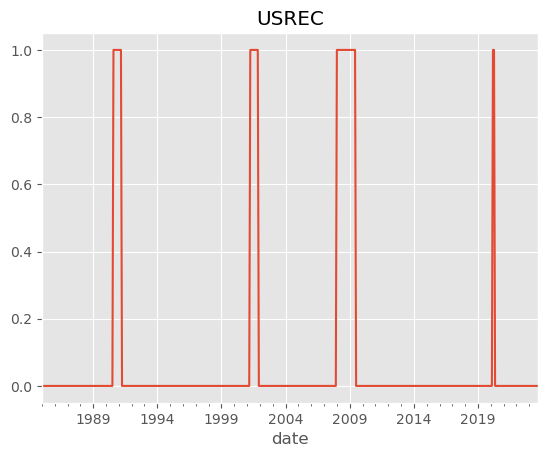

In [18]:
dataset_1985.set_index("date")['USREC'].plot(title='USREC')

In [17]:
dataset_1985.columns

Index(['date', 'USREC', 'GDPC1', 'PIECTR', 'PRS85006013', 'IPB50001SQ',
       'CQRMTSPL', 'T10Y3M', 'T10Y2Y', 'BAMLH0A0HYM2', 'BAA10Y', 'AAAFF',
       'T10YIE', 'T5YIE', 'VIXCLS', 'GVZCLS', 'OVXCLS', 'ATLSBUSRGEP',
       'ATLSBUEGEP', 'ATLSBUSRGUP', 'ATLSBUEGUP'],
      dtype='object')

In [ ]:
dataset_1985.drop()

In [26]:
infos['id'].tolist()

['USREC',
 'GDPC1',
 'PIECTR',
 'PRS85006013',
 'IPB50001SQ',
 'CQRMTSPL',
 'T10Y3M',
 'T10Y2Y',
 'BAMLH0A0HYM2',
 'BAA10Y',
 'AAAFF',
 'T10YIE',
 'T5YIE',
 'VIXCLS',
 'GVZCLS',
 'OVXCLS',
 'ATLSBUSRGEP',
 'ATLSBUEGEP',
 'ATLSBUSRGUP',
 'ATLSBUEGUP']

In [25]:
infos['title'].tolist()

['NBER based Recession Indicators for the United States from the Period following the Peak through the Trough',
 'Real Gross Domestic Product',
 'Real personal income excluding current transfer receipts',
 'Nonfarm Business Sector: Employment for All Workers',
 'Industrial Production: Total Index',
 'Real Manufacturing and Trade Industries Sales',
 '10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity',
 '10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity',
 'ICE BofA US High Yield Index Option-Adjusted Spread',
 "Moody's Seasoned Baa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity",
 "Moody's Seasoned Aaa Corporate Bond Minus Federal Funds Rate",
 '10-Year Breakeven Inflation Rate',
 '5-Year Breakeven Inflation Rate',
 'CBOE Volatility Index: VIX',
 'CBOE Gold ETF Volatility Index',
 'CBOE Crude Oil ETF Volatility Index',
 'Business Expectations: Sales Revenue Growth',
 'Business Expectations: Employment Growt

In [27]:
for x , y in zip(infos['id'],infos['title']):
    print(f'{x}:{y}')

USREC:NBER based Recession Indicators for the United States from the Period following the Peak through the Trough
GDPC1:Real Gross Domestic Product
PIECTR:Real personal income excluding current transfer receipts
PRS85006013:Nonfarm Business Sector: Employment for All Workers
IPB50001SQ:Industrial Production: Total Index
CQRMTSPL:Real Manufacturing and Trade Industries Sales
T10Y3M:10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity
T10Y2Y:10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
BAMLH0A0HYM2:ICE BofA US High Yield Index Option-Adjusted Spread
BAA10Y:Moody's Seasoned Baa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity
AAAFF:Moody's Seasoned Aaa Corporate Bond Minus Federal Funds Rate
T10YIE:10-Year Breakeven Inflation Rate
T5YIE:5-Year Breakeven Inflation Rate
VIXCLS:CBOE Volatility Index: VIX
GVZCLS:CBOE Gold ETF Volatility Index
OVXCLS:CBOE Crude Oil ETF Volatility Index
ATLSBUSRGEP:Business Expecta

In [16]:
dataset_1985.drop("date",axis=1).corr()

,USREC,GDPC1,PIECTR,PRS85006013,IPB50001SQ,CQRMTSPL,T10Y3M,T10Y2Y,BAMLH0A0HYM2,BAA10Y,AAAFF,T10YIE,T5YIE,VIXCLS,GVZCLS,OVXCLS,ATLSBUSRGEP,ATLSBUEGEP,ATLSBUSRGUP,ATLSBUEGUP
USREC,1.000000,-0.009714,-0.003266,0.012234,0.006577,-0.026454,0.112720,0.145773,0.632066,0.474157,0.145350,-0.342043,-0.392368,0.441485,0.656750,0.498514,-0.336488,-0.188028,0.061136,0.022170
GDPC1,-0.009714,1.000000,0.997122,0.946729,0.928998,0.991414,-0.225174,-0.007227,-0.183626,0.257454,0.133551,-0.111607,0.078761,0.056337,-0.480719,0.073929,0.531421,0.345693,0.406195,0.277440
PIECTR,-0.003266,0.997122,1.000000,0.949478,0.919980,0.990071,-0.256847,-0.042504,-0.180188,0.252546,0.103282,-0.134608,0.067169,0.078986,-0.444701,0.127436,0.376564,0.397565,0.578615,0.455738
PRS85006013,0.012234,0.946729,0.949478,1.000000,0.953588,0.969350,-0.373381,-0.183100,-0.286273,0.154958,-0.005974,-0.012362,0.200549,0.064475,-0.452178,0.049268,0.692025,0.022870,-0.314060,-0.408451
IPB50001SQ,0.006577,0.928998,0.919980,0.953588,1.000000,0.959626,-0.243250,-0.009426,-0.273901,0.261188,0.124906,0.209787,0.304483,0.060645,-0.513153,-0.265342,0.738959,0.078433,-0.561477,-0.595747
CQRMTSPL,-0.026454,0.991414,0.990071,0.969350,0.959626,1.000000,-0.265973,-0.050177,-0.278854,0.220538,0.095884,0.001028,0.206276,0.036615,-0.507300,-0.007296,0.666069,0.532901,0.355001,0.277553
T10Y3M,0.112720,-0.225174,-0.256847,-0.373381,-0.243250,-0.265973,1.000000,0.901670,0.367625,0.320496,0.846858,-0.077115,-0.246874,0.038310,0.434604,-0.027783,0.237187,0.588862,-0.144765,0.148950
T10Y2Y,0.145773,-0.007227,-0.042504,-0.183100,-0.009426,-0.050177,0.901670,1.000000,0.398817,0.475197,0.865525,-0.112376,-0.306295,0.079036,0.415374,-0.111727,0.070400,0.529684,-0.116265,0.151093
BAMLH0A0HYM2,0.632066,-0.183626,-0.180188,-0.286273,-0.273901,-0.278854,0.367625,0.398817,1.000000,0.931513,0.494091,-0.633987,-0.726063,0.699414,0.803539,0.560555,-0.622731,-0.411752,0.380127,0.315226
BAA10Y,0.474157,0.257454,0.252546,0.154958,0.261188,0.220538,0.320496,0.475197,0.931513,1.000000,0.517327,-0.648474,-0.752178,0.613796,0.784171,0.522106,-0.639238,-0.275053,0.311954,0.334098
